# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [107]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [108]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [109]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720710348014e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [110]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [111]:
from gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


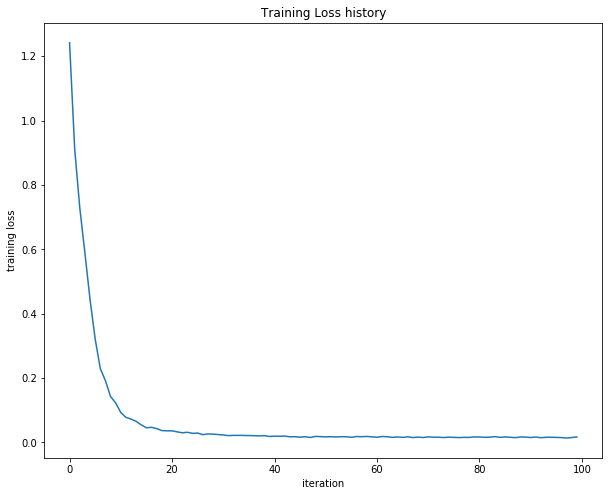

In [112]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [131]:
def load_satellite():
    train = np.loadtxt('data/sat_train.txt')
    test = np.loadtxt('data/sat_test.txt')
    
    np.random.seed(10)
    np.random.shuffle(train)
    np.random.shuffle(test)
    
    X_train, y_train = train[:,:36],train[:,36]
    X_test, y_test = test[:, :36], test[:,36]
    
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    train_label7 = y_train == 7
    y_train[train_label7] = 6
    y_train -= 1
    
    test_label7 = y_test == 7
    y_test[test_label7] = 6
    y_test -= 1
    
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = load_satellite()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train)
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[1 2 3 4 5 7]
[1 2 3 4 5 7]
(4435, 36) (4435,) (2000, 36) (2000,)
[5 4 1 ... 0 2 1]
[[   0 1072]
 [   1  479]
 [   2  961]
 [   3  415]
 [   4  470]
 [   5 1038]]
[[  0 461]
 [  1 224]
 [  2 397]
 [  3 211]
 [  4 237]
 [  5 470]]


In [132]:
def get_satellite_data(num_training=4035, num_validation=400, num_test=2000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    X_train, y_train, X_test, y_test = load_satellite()
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

     
    num_features = 36
#     # Subsample the data
# #     mask = list(range(num_training, num_training + num_validation))
#     X_val = train.iloc[num_training:num_training+num_validation, :num_features]
#     y_val = train.iloc[num_training:num_training+num_validation, 36]
# #     mask = list(range(num_training))
#     X_train = train.iloc[:num_training, :num_features]
#     y_train = train.iloc[:num_training, 36]
# #     mask = list(range(num_test))
#     X_test = test.iloc[:, :num_features]
#     y_test = test.iloc[:, 36]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_satellite_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
[1 2 3 4 5 7]
[1 2 3 4 5 7]
Train data shape:  (4035, 36)
Train labels shape:  (4035,)
Validation data shape:  (400, 36)
Validation labels shape:  (400,)
Test data shape:  (2000, 36)
Test labels shape:  (2000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [135]:
input_size = 36
hidden_size = 10
num_classes = 6
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=100, batch_size=32,
            learning_rate=1e-2, learning_rate_decay=10e-6,
            reg=0.25, verbose=True)

# Predict on the validation set
pred = net.predict(X_val)
val_acc = (pred == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 100: loss 1.791759
Validation accuracy:  0.2075


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

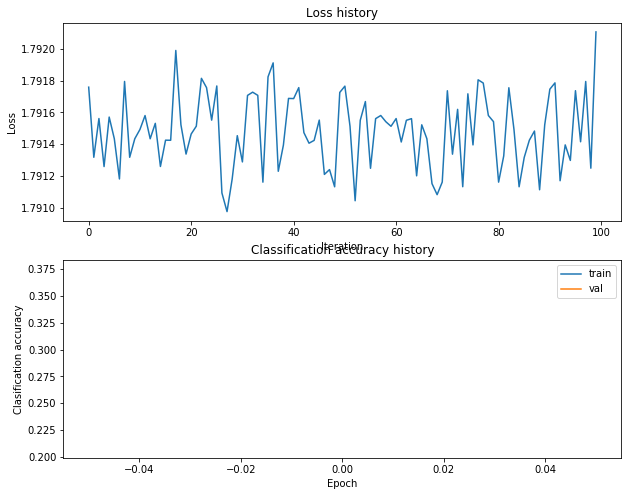

In [136]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [137]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best_val = -1
results = {}

np.random.seed(0)

batch_sizes = [4, 8, 16, 32, 64]
learning_rates = [1e-4,1e-3,5e-3]
regs = [0.5,0.7]

grid_search=[(x,y,z) for x in batch_sizes for y in learning_rates for z in regs]

for batch_size,learning_rate,reg in grid_search:
    
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    # Train the network
    net.train(X_train, y_train, X_val, y_val,
                num_iters=3000, batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=True)

    # Predict on the validation set and compute accuracy
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)
    
    results[(batch_size,learning_rate,reg)]=val_acc
    
    if val_acc>best_val:
        best_val=val_acc
        best_net=net
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 3000: loss 1.791762
iteration 100 / 3000: loss 1.791326
iteration 200 / 3000: loss 1.790868
iteration 300 / 3000: loss 1.790896
iteration 400 / 3000: loss 1.790672
iteration 500 / 3000: loss 1.791835
iteration 600 / 3000: loss 1.787615
iteration 700 / 3000: loss 1.789037
iteration 800 / 3000: loss 1.788894
iteration 900 / 3000: loss 1.786614
iteration 1000 / 3000: loss 1.788924
iteration 1100 / 3000: loss 1.788352
iteration 1200 / 3000: loss 1.788077
iteration 1300 / 3000: loss 1.783210
iteration 1400 / 3000: loss 1.783644
iteration 1500 / 3000: loss 1.792448
iteration 1600 / 3000: loss 1.781608
iteration 1700 / 3000: loss 1.779594
iteration 1800 / 3000: loss 1.784601
iteration 1900 / 3000: loss 1.791723
iteration 2000 / 3000: loss 1.790428
iteration 2100 / 3000: loss 1.785225
iteration 2200 / 3000: loss 1.777543
iteration 2300 / 3000: loss 1.785180
iteration 2400 / 3000: loss 1.785212
iteration 2500 / 3000: loss 1.774942
iteration 2600 / 3000: loss 1.782451
iteration 270

iteration 900 / 3000: loss 1.791720
iteration 1000 / 3000: loss 1.788820
iteration 1100 / 3000: loss 1.789778
iteration 1200 / 3000: loss 1.792004
iteration 1300 / 3000: loss 1.787769
iteration 1400 / 3000: loss 1.794258
iteration 1500 / 3000: loss 1.788903
iteration 1600 / 3000: loss 1.783902
iteration 1700 / 3000: loss 1.793931
iteration 1800 / 3000: loss 1.794612
iteration 1900 / 3000: loss 1.787787
iteration 2000 / 3000: loss 1.781395
iteration 2100 / 3000: loss 1.784596
iteration 2200 / 3000: loss 1.784833
iteration 2300 / 3000: loss 1.788362
iteration 2400 / 3000: loss 1.791646
iteration 2500 / 3000: loss 1.779625
iteration 2600 / 3000: loss 1.778895
iteration 2700 / 3000: loss 1.777136
iteration 2800 / 3000: loss 1.790430
iteration 2900 / 3000: loss 1.777537
Validation accuracy:  0.4125
iteration 0 / 3000: loss 1.791762
iteration 100 / 3000: loss 1.789249
iteration 200 / 3000: loss 1.781577
iteration 300 / 3000: loss 1.780732
iteration 400 / 3000: loss 1.779112
iteration 500 / 3

iteration 2200 / 3000: loss 0.584373
iteration 2300 / 3000: loss 0.702107
iteration 2400 / 3000: loss 0.818246
iteration 2500 / 3000: loss 0.514548
iteration 2600 / 3000: loss 0.500884
iteration 2700 / 3000: loss 0.819855
iteration 2800 / 3000: loss 0.783082
iteration 2900 / 3000: loss 0.784133
Validation accuracy:  0.8275
iteration 0 / 3000: loss 1.791763
iteration 100 / 3000: loss 1.789786
iteration 200 / 3000: loss 1.784349
iteration 300 / 3000: loss 1.778286
iteration 400 / 3000: loss 1.728053
iteration 500 / 3000: loss 1.389270
iteration 600 / 3000: loss 1.051832
iteration 700 / 3000: loss 1.071196
iteration 800 / 3000: loss 1.098846
iteration 900 / 3000: loss 1.040989
iteration 1000 / 3000: loss 1.330753
iteration 1100 / 3000: loss 1.137516
iteration 1200 / 3000: loss 0.874424
iteration 1300 / 3000: loss 0.725442
iteration 1400 / 3000: loss 1.006697
iteration 1500 / 3000: loss 0.628928
iteration 1600 / 3000: loss 1.208520
iteration 1700 / 3000: loss 0.912346
iteration 1800 / 3000

iteration 900 / 3000: loss 0.829792
iteration 1000 / 3000: loss 0.786135
iteration 1100 / 3000: loss 0.887245
iteration 1200 / 3000: loss 0.665529
iteration 1300 / 3000: loss 0.851945
iteration 1400 / 3000: loss 0.571857
iteration 1500 / 3000: loss 0.711218
iteration 1600 / 3000: loss 0.666469
iteration 1700 / 3000: loss 0.864565
iteration 1800 / 3000: loss 0.790889
iteration 1900 / 3000: loss 0.872159
iteration 2000 / 3000: loss 0.631522
iteration 2100 / 3000: loss 0.820549
iteration 2200 / 3000: loss 0.810606
iteration 2300 / 3000: loss 0.786356
iteration 2400 / 3000: loss 0.673046
iteration 2500 / 3000: loss 0.754273
iteration 2600 / 3000: loss 0.699561
iteration 2700 / 3000: loss 0.659641
iteration 2800 / 3000: loss 0.702248
iteration 2900 / 3000: loss 0.892172
Validation accuracy:  0.8525
iteration 0 / 3000: loss 1.791763
iteration 100 / 3000: loss 1.472599
iteration 200 / 3000: loss 1.143000
iteration 300 / 3000: loss 0.887887
iteration 400 / 3000: loss 0.779912
iteration 500 / 3

iteration 2500 / 3000: loss 0.797011
iteration 2600 / 3000: loss 0.756603
iteration 2700 / 3000: loss 0.834966
iteration 2800 / 3000: loss 0.943655
iteration 2900 / 3000: loss 0.897633
Validation accuracy:  0.825


# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [138]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.821


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*